In [1]:
import os
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.image as pltimg
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [82]:
file_name='C:\\Users\\DELL\\OneDrive - The University of Texas at Dallas\\Projects\\Walmart BI Project\\Walmart.csv'
data=pd.read_csv(file_name)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


##### There is no null values in the dataframe
### Creating new data variables from the Date variables

In [83]:
data['Year'] = data.Date.str[6:10]
data['Month'] = data.Date.str[3:5]
data['Day'] = data.Date.str[0:2]
data['DateTime'] = pd.to_datetime(data['Date'])  
data['Week_Day'] = data['DateTime'].dt.day_name()
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,DateTime,Week_Day
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,2010,02,05,2010-05-02,Sunday
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,2010,02,12,2010-12-02,Thursday
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,2010,02,19,2010-02-19,Friday
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,2010,02,26,2010-02-26,Friday
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,2010,03,05,2010-05-03,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,2012,09,28,2012-09-28,Friday
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,2012,10,05,2012-05-10,Thursday
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,2012,10,12,2012-12-10,Monday
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,19,2012-10-19,Friday


In [84]:
data = data.drop('Date',1)
data = data.drop('DateTime',1)
data = data.drop('Week_Day',1)
data

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010,02,05
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010,02,12
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2010,02,19
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2010,02,26
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,2010,03,05
...,...,...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,2012,09,28
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,2012,10,05
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,2012,10,12
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,19


In [85]:
cols = ['Year','Month','Day']
data[cols] = data[cols].apply(pd.to_numeric, errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
 7   Year          6435 non-null   int64  
 8   Month         6435 non-null   int64  
 9   Day           6435 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 502.9 KB


###### Checking for Outliers

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-p

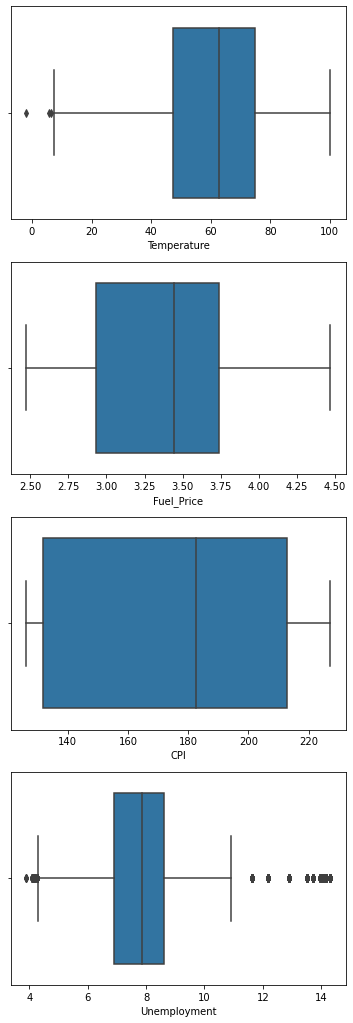

In [86]:
fig, axs = plt.subplots(4,figsize=(6,18))
X = data[['Temperature','Fuel_Price','CPI','Unemployment']]
for i,column in enumerate(X):
    sns.boxplot(data[column], ax=axs[i])

### Dropping the Outliers

In [87]:
data = data[(data['Unemployment']<10) & (data['Unemployment']>4.5) & (data['Temperature']>10)]
data

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,12
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,5
...,...,...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,28
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,2012,10,5
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,2012,10,12
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,19


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-p

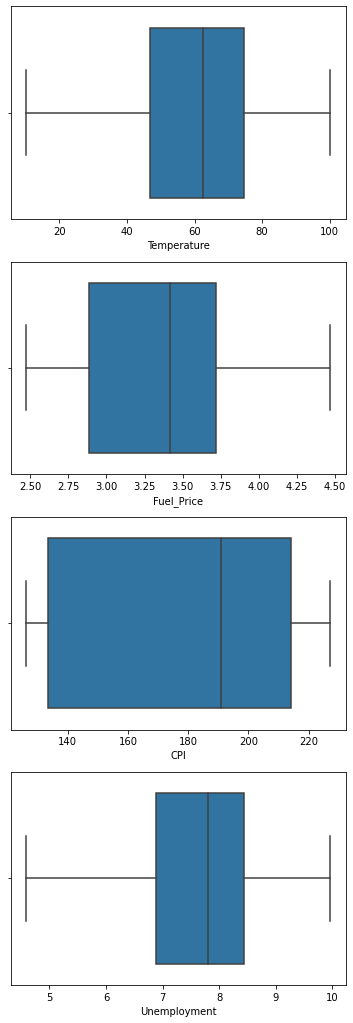

In [88]:
fig, axs = plt.subplots(4,figsize=(6,18))
X = data[['Temperature','Fuel_Price','CPI','Unemployment']]
for i,column in enumerate(X):
    sns.boxplot(data[column], ax=axs[i])

##### The Outliers are removed

### Sum of Weekly_Sales for each store, then sorted by total sales

Text(0.5, 1.0, 'Total sales for each store')

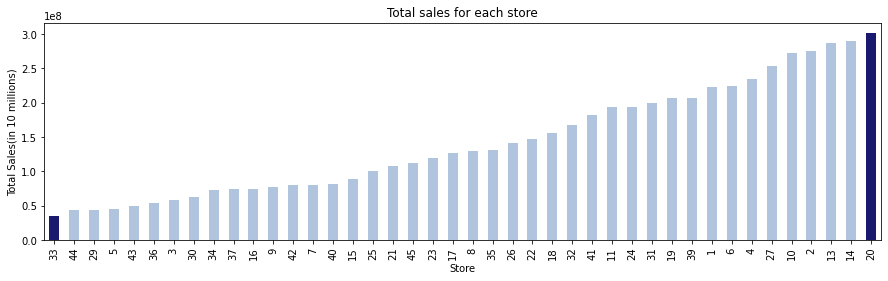

In [101]:
plt.figure(figsize=(15,4))
total_sales_for_each_store = data.groupby('Store')['Weekly_Sales'].sum().sort_values()
clrs = ['lightsteelblue' if ((x < max(total_sales_for_each_store)) and (x > min(total_sales_for_each_store))) else 'midnightblue' for x in total_sales_for_each_store]
total_sales_for_each_store.plot(kind='bar',color=clrs);
plt.xlabel('Store')
plt.ylabel('Total Sales(in 10 millions)')
plt.title('Total sales for each store')

##### Store 20 has the highest total sales around \\$30 millions while Store 33 has the lowest total sales lesser than \\$5millions

### Finding Store that has the maximum standard deviation of weekly sales of all the stores. 

In [90]:
data_std = pd.DataFrame(data.groupby('Store')['Weekly_Sales'].std().sort_values(ascending=False))
data_std.head(1)
print('The store that has maximum standard deviation is',(data_std.head(1).index[0]))

The store that has maximum standard deviation is 14


### Effect of Fuel Price on weekly sales of Store #14

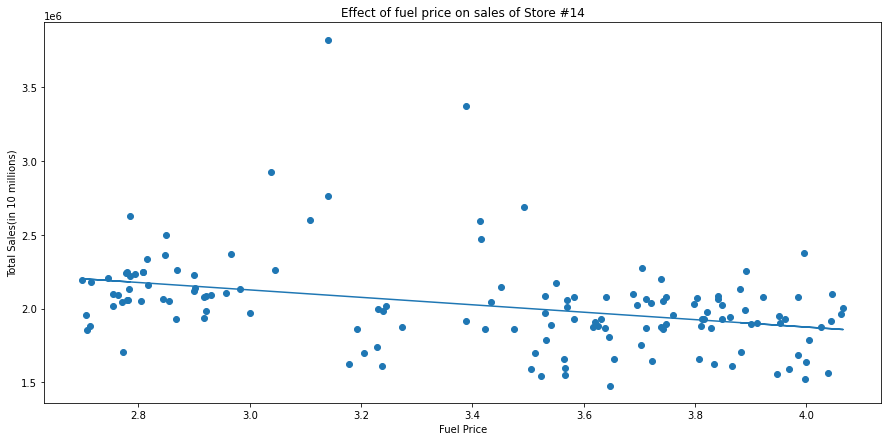

In [91]:
plt.figure(figsize=(15,7))
x= data['Fuel_Price'][data['Store']==14]
y= data[data['Store'] == data_std.head(1).index[0]]['Weekly_Sales']
plt.scatter(x,y)
z= np.polyfit(x,y,1)
p= np.poly1d(z)
plt.plot(x,p(x))
plt.xlabel('Fuel Price')
plt.ylabel('Total Sales(in 10 millions)')
plt.title('Effect of fuel price on sales of Store #'+ str(data_std.head(1).index[0]));

##### There is a gradual decrease in weekly sales of Store #14 due to increase in fuel price. 

###  Effect of Unemployment rate on Weekly Sales

Text(0.5, 1.0, 'Overall effect of Unemployment rate on Weekly sales')

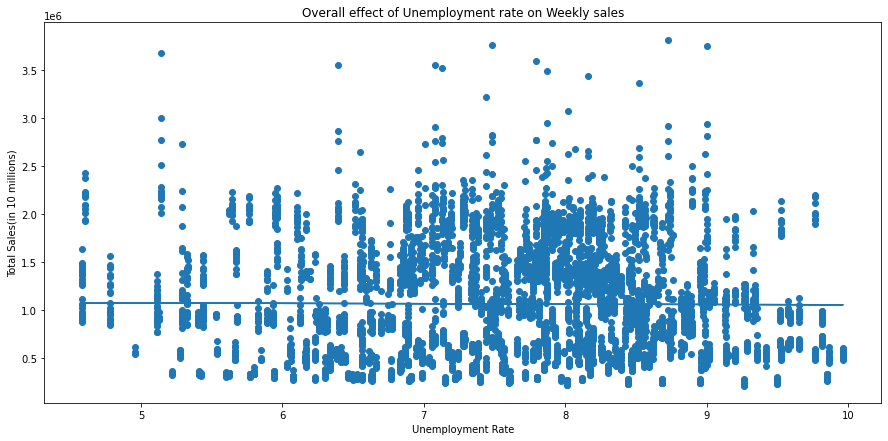

In [92]:
plt.figure(figsize=(15,7))
x1= np.array(data['Unemployment'])
y1= np.array(data['Weekly_Sales'])
plt.scatter(x1,y1)
z= np.polyfit(x1,y1,1)
p= np.poly1d(z)
plt.plot(x1,p(x1))
plt.xlabel('Unemployment Rate')
plt.ylabel('Total Sales(in 10 millions)')
plt.title('Overall effect of Unemployment rate on Weekly sales')

#### There does not seem to be any effect of increasing unemployment on the weekly sales of Walmart stores

### Effect of CPI on Weekly Sales

Text(0.5, 1.0, 'Overall effect of Consumer Price Index on Weekly sales')

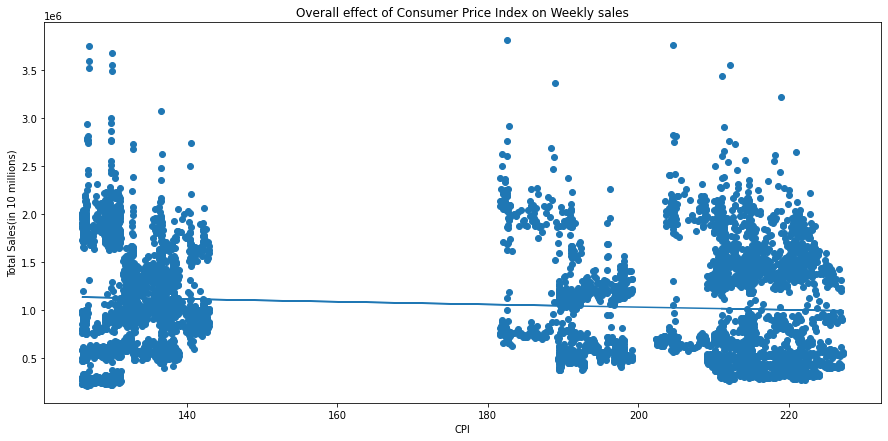

In [93]:
plt.figure(figsize=(15,7))
x1= np.array(data['CPI'])
y1= np.array(data['Weekly_Sales'])
plt.scatter(x1,y1)
z= np.polyfit(x1,y1,1)
p= np.poly1d(z)
plt.plot(x1,p(x1))
plt.xlabel('CPI')
plt.ylabel('Total Sales(in 10 millions)')
plt.title('Overall effect of Consumer Price Index on Weekly sales')

##### There seem to be slight decrease in weekly sales of increasing of CPI

### Monthly Sales for each year

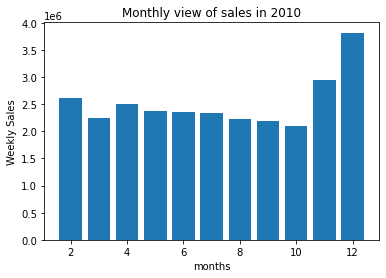

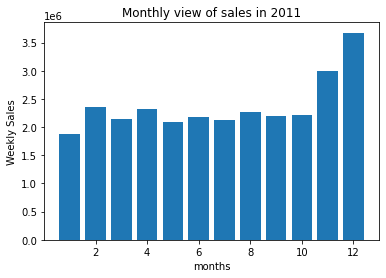

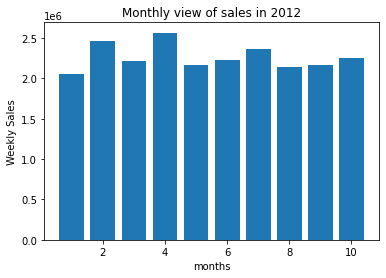

In [94]:
plt.bar(data[data.Year==2010]["Month"],data[data.Year==2010]["Weekly_Sales"])
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2010")
plt.show()
plt.bar(data[data.Year==2011]["Month"],data[data.Year==2011]["Weekly_Sales"])
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2011")
plt.show()
plt.bar(data[data.Year==2012]["Month"],data[data.Year==2012]["Weekly_Sales"])
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2012")
plt.show()

In [73]:
# Import sklearn 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [96]:
# Select independent variables and target variables
X = data[['Store','Fuel_Price','CPI','Unemployment','Day','Month','Year']]
y = data['Weekly_Sales']

# Split data to train and test (0.80:0.20)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

Linear Regression:

Accuracy: 13.591750034425154
Mean Absolute Error: 449072.66607421386
Mean Squared Error: 288902132123.2427
Root Mean Squared Error: 537496.1694033202


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


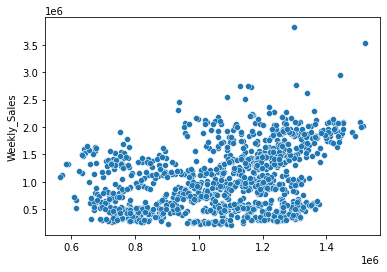

In [97]:
# Linear Regression model
print('Linear Regression:')
print()
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print('Accuracy:',reg.score(X_train, y_train)*100)


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


sns.scatterplot(y_pred, y_test);

Random Forest Regressor:

Accuracy: 94.88788235759404
Mean Absolute Error: 64210.185210665564
Mean Squared Error: 16440513434.711752
Root Mean Squared Error: 128220.5655685224


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


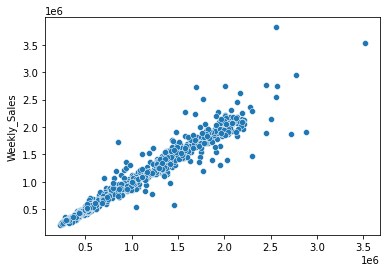

In [98]:
# Random Forest Regressor
print('Random Forest Regressor:')
print()
rfr = RandomForestRegressor(n_estimators = 400,max_depth=15,n_jobs=5)        
rfr.fit(X_train,y_train)
y_pred=rfr.predict(X_test)
print('Accuracy:',rfr.score(X_test, y_test)*100)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


sns.scatterplot(y_pred, y_test);